# Introduction

Welcome to *tntorch*! This notebook illustrates a few basic tensor manipulation and optimization use cases.

### First Example

In [1]:
import torch
import tntorch as tn

Let's create a 2D random tensor of size $128 \times 128$ and tensor train rank 10 (equivalent to a rank-10 matrix). The `requires_grad` flag tells PyTorch that this tensor should be optimizable:

In [2]:
t = tn.randn([128, 128], ranks_tt=10, requires_grad=True)
t

2D TT tensor:

 128 128
  |   |
 (0) (1)
 / \ / \
1   10  1

The spatial dimensions are shown above, the TT ranks are below, and the cores are listed as `(0)` and `(1)` in the middle.

In many ways, compressed tensors can be treated as if they were normal, uncompressed tensors:

In [3]:
print(tn.mean(t))
print(tn.var(t))
print(tn.norm(t))
print(tn.norm(t+t))
print(tn.norm(2*t))

tensor(-0.0308, grad_fn=<DivBackward1>)
tensor(11.1852, grad_fn=<DivBackward1>)
tensor(428.1056, grad_fn=<SqrtBackward>)
tensor(856.2112, grad_fn=<SqrtBackward>)
tensor(856.2112, grad_fn=<SqrtBackward>)


To decompress a tensor into a `torch.Tensor`, we can use the function `full()`:

In [4]:
print(t.full().shape)

torch.Size([128, 128])


The function `numpy()` returns the same, just as a NumPy tensor. Let's use it to visualize the contents of our random tensor in *matplotlib*:

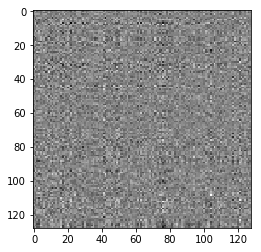

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(t.numpy(), cmap='gray')
plt.show()

To optimize tensors we can use *tntorch*'s helper function `optimize()`. 

Now, we will make our tensor zero over the top left quadrant by minimizing its norm:

iter: 0      | loss: 224.378254 | total time:    0.0014
iter: 500    | loss:  93.731823 | total time:    0.3903
iter: 1000   | loss:  23.174971 | total time:    0.7658
iter: 1356   | loss:   0.092772 | total time:    1.0260 <- converged (tol=0.0001)


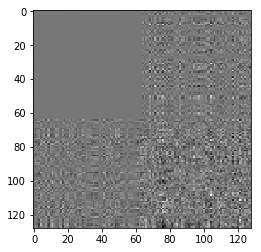

In [6]:
def loss(t):
    return tn.norm(t[:64, :64])

tn.optimize(t, loss)
plt.imshow(t.numpy(), cmap='gray')
plt.show()

### Second Example

Next, we will fit our tensor to be a rank-10 approximation of a grayscale image:

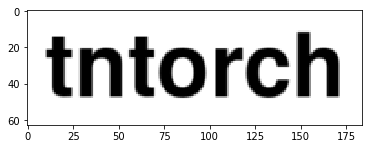

iter: 0      | loss: 198.329096 | total time:    0.0013
iter: 500    | loss:  29.891490 | total time:    0.4593
iter: 1000   | loss:  18.955652 | total time:    0.9764
iter: 1500   | loss:   8.515044 | total time:    1.4727
iter: 2000   | loss:   4.255348 | total time:    2.0007
iter: 2500   | loss:   3.517110 | total time:    2.5190
iter: 3000   | loss:   2.764703 | total time:    3.0315
iter: 3138   | loss:   2.702581 | total time:    3.1735 <- converged (tol=0.0001)


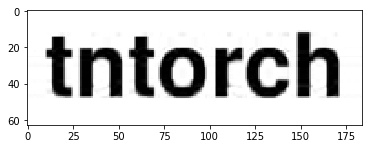

In [7]:
im = torch.DoubleTensor(plt.imread('../images/text.png'))
plt.imshow(im.numpy(), cmap='gray')
plt.show()

t = tn.rand(im.shape, ranks_tt=10, requires_grad=True)

def loss(t):
    return torch.norm(t.full() - im)

tn.optimize(t, loss)   

plt.imshow(t.numpy(), cmap='gray', vmin=im.min(), vmax=im.max())
plt.show()

For other available tensor formats beyond plain TT, see [this notebook](https://github.com/rballester/tntorch/blob/master/tutorials/main_formats.ipynb).